In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score

In [234]:
data=pd.read_csv("C:/Users/Suleyman/Downloads/CarPrice_Assignment.csv")
data=data.dropna()
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Statistical Data

In [235]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


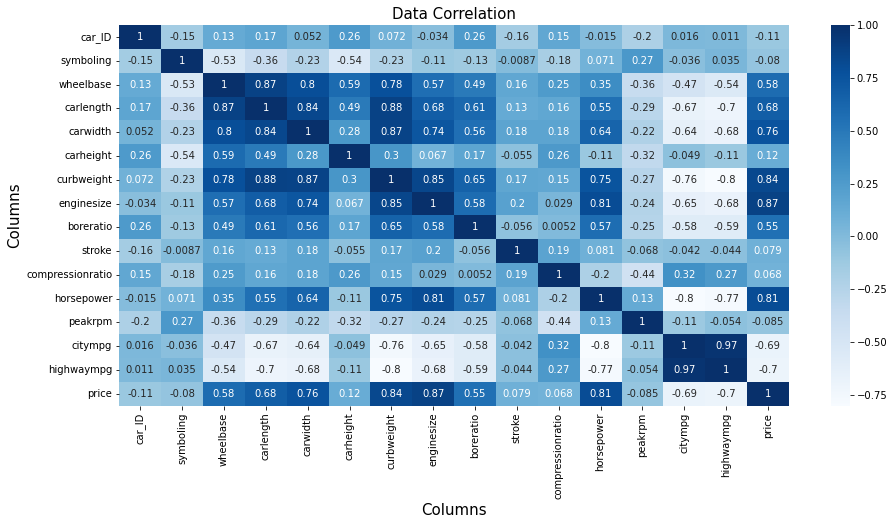

In [236]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()

### Selecting Machine Names Only

In [237]:
data["CarName"]=data["CarName"].str.split(" ", n = 1, expand = True)[0]
data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Information about mutable inner classes

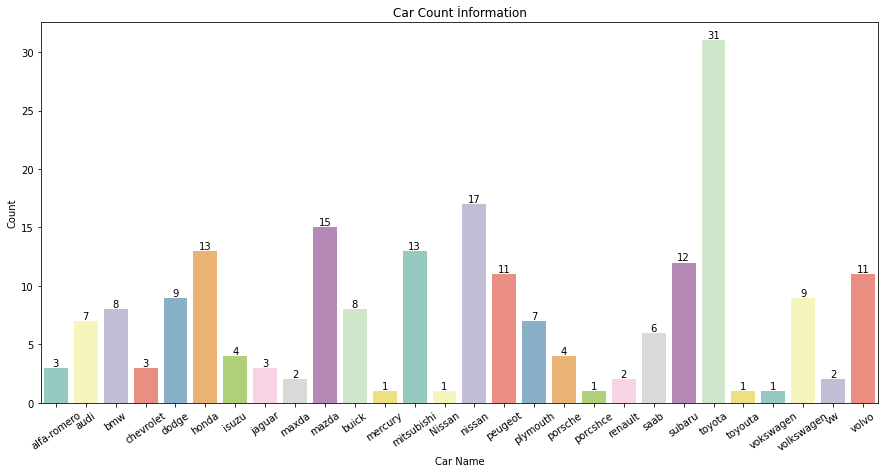

In [238]:
plt.figure(figsize=(15,7))
car=sns.countplot(data=data,x="CarName",palette=sns.color_palette("Set3"))
for i in car.containers:
    car.bar_label(i)
car.set_xticklabels(car.get_xticklabels(),rotation=35)
plt.title("Car Count İnformation")
plt.ylabel("Count")
plt.xlabel("Car Name")
plt.show()

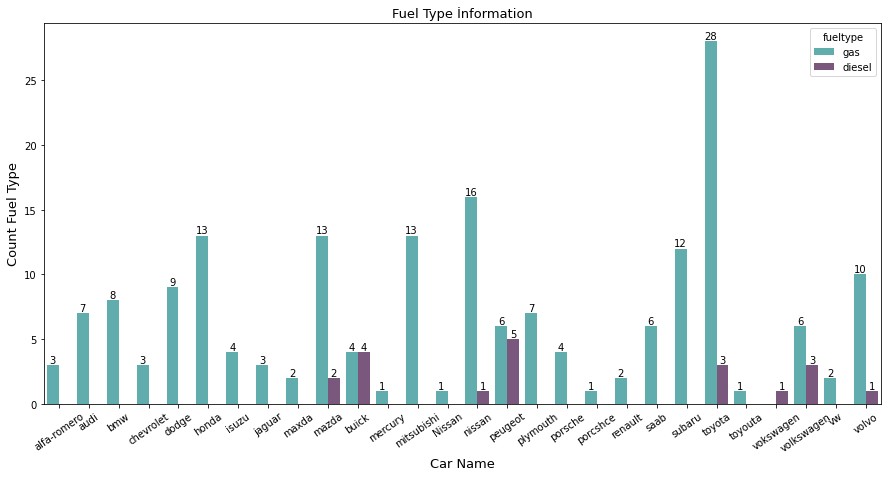

In [239]:
plt.figure(figsize=(15,7))
car=sns.countplot(data=data,x="CarName",hue="fueltype",palette=sns.color_palette(["#54BAB9","#7F5283"]))
for i in car.containers:
    car.bar_label(i)
car.set_xticklabels(car.get_xticklabels(),rotation=35)
plt.title("Fuel Type İnformation",size=13)
plt.ylabel("Count Fuel Type",size=13)
plt.xlabel("Car Name",size=13)
plt.show()

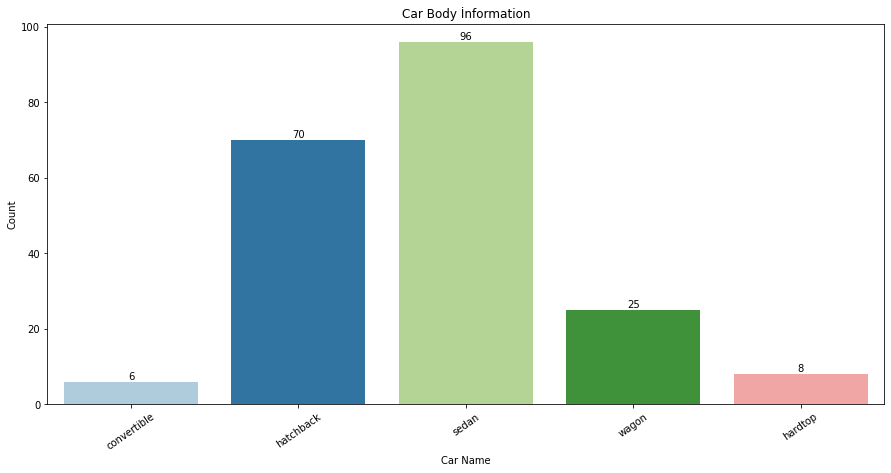

In [240]:
plt.figure(figsize=(15,7))
car=sns.countplot(data=data,x="carbody",palette=sns.color_palette("Paired"))
for i in car.containers:
    car.bar_label(i)
car.set_xticklabels(car.get_xticklabels(),rotation=35)
plt.title("Car Body İnformation")
plt.ylabel("Count")
plt.xlabel("Car Name")
plt.show()

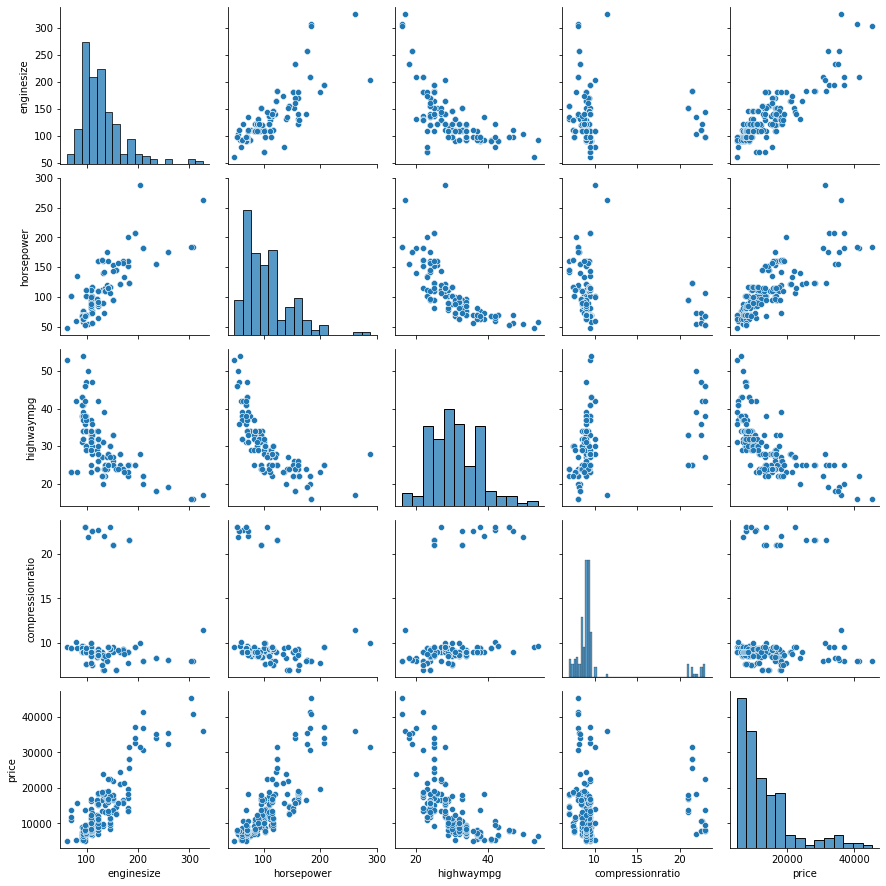

In [241]:
columns=data[["enginesize","horsepower","highwaympg","compressionratio","price"]]
sns.pairplot(columns)
plt.show()

### Categories View classes of variables

In [242]:
encodercol=data.select_dtypes(include=["object"])
for i in encodercol:
    print(data[i].value_counts())

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l   

### Organization of encoder process

In [243]:
from sklearn.preprocessing import LabelEncoder
#
df_colname=list(encodercol)
encoder=[]
for i in encodercol:
    LBL=LabelEncoder()
    encoder.append(LBL.fit_transform(encodercol[i]))

In [244]:
newencoder=pd.DataFrame(encoder).T
newencoder.columns=[encodercol]

In [245]:
newencoder

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,1,0,1,0,2,0,0,2,5
1,1,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,2,1,0,0,3,1,0,3,2,5
4,2,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,26,1,0,0,3,2,0,3,2,5
201,26,1,1,0,3,2,0,3,2,5
202,26,1,0,0,3,2,0,5,3,5
203,26,0,1,0,3,2,0,3,3,3


In [246]:
floatdata=data.select_dtypes(include=["float64","int"])
newdata=pd.concat([floatdata,newencoder],axis=1)
newdata

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,"(CarName,)","(fueltype,)","(aspiration,)","(doornumber,)","(carbody,)","(drivewheel,)","(enginelocation,)","(enginetype,)","(cylindernumber,)","(fuelsystem,)"
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,1,0,1,0,2,0,0,2,5
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,1,0,1,0,2,0,0,2,5
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,1,0,1,2,2,0,5,3,5
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,2,1,0,0,3,1,0,3,2,5
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,2,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,26,1,0,0,3,2,0,3,2,5
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,26,1,1,0,3,2,0,3,2,5
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,26,1,0,0,3,2,0,5,3,5
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,26,0,1,0,3,2,0,3,3,3


### Check Outliers

C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


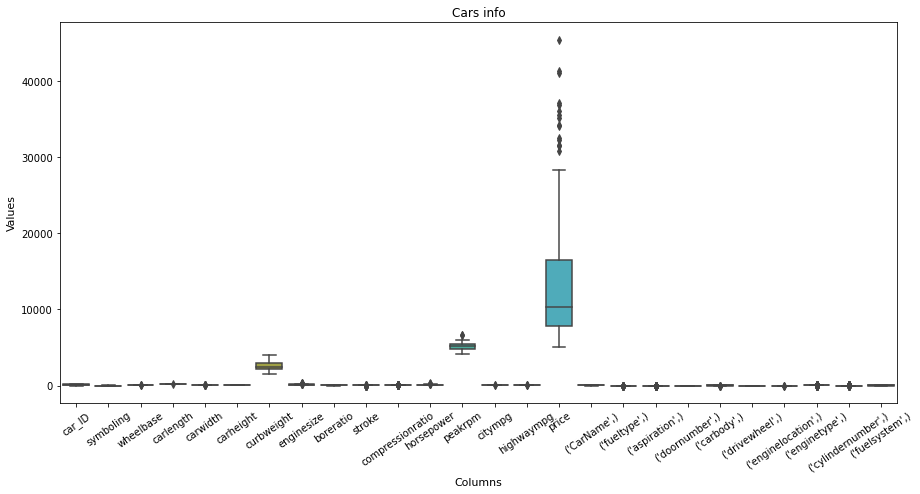

In [247]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=newdata)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Cars info")
plt.ylabel("Values",size=11)
plt.xlabel("Columns",size=11);

### Struggle with outliers values

In [248]:
outlier=newdata["price"]
Q1=outlier.quantile(0.25)
Q3=outlier.quantile(0.75)
IQR=Q3-Q1
underoutliers=Q1-1.5*IQR
upperoutliers=Q3+1.5*IQR
under_border=(outlier<underoutliers)
upper_border=outlier>upperoutliers

In [249]:
### Fixation of outlier values with lower and upper values
outlier[under_border]=underoutliers
outlier[upper_border]=upperoutliers

C:\Users\Suleyman\AppData\Local\Temp/ipykernel_19888/1278182381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier[under_border]=underoutliers
C:\Users\Suleyman\AppData\Local\Temp/ipykernel_19888/1278182381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier[upper_border]=upperoutliers


C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


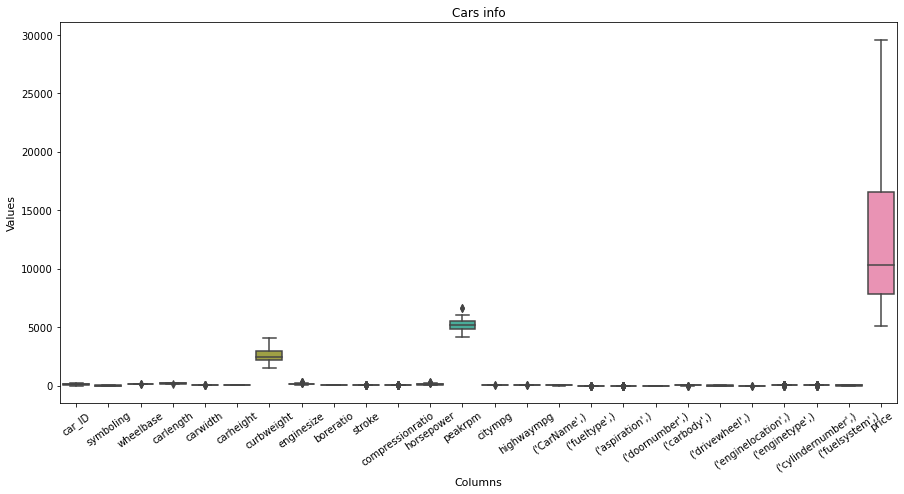

In [250]:
### Adding fixed values to the main dataframe
withoutoutlier=pd.DataFrame(outlier)
withoutoutlierdata=pd.concat([newdata.drop("price",axis=1),withoutoutlier],axis=1)
#
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=withoutoutlierdata)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Cars info")
plt.ylabel("Values",size=11)
plt.xlabel("Columns",size=11);

In [251]:
X=withoutoutlierdata.drop(["price","car_ID","symboling"],axis=1)
y=withoutoutlierdata["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Building and testing machine learning models

In [252]:
### Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
linear_model=reg.fit(X_train,y_train)
print("Test RMSE",np.sqrt(mean_squared_error(y_test,linear_model.predict(X_test))))
print("Train RMSE",np.sqrt(mean_squared_error(y_train,linear_model.predict(X_train))))
print("R2 Test",r2_score(y_test,linear_model.predict(X_test)))
print("R2 Train",r2_score(y_train,linear_model.predict(X_train)))

Test RMSE 2509.5960050584395
Train RMSE 1965.7105736169894
R2 Test 0.8653783670615763
R2 Train 0.9126037017465055


In [253]:
### Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
#
lasso_model=Lasso().fit(X_train,y_train)
alphas=10**np.linspace(10,-2,100)*0.5
lass_cv=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True).fit(X_train,y_train)
lasso_turned_model=Lasso(alpha=lass_cv.alpha_).fit(X_train,y_train)
#
print("Test RMSE",np.sqrt(mean_squared_error(y_test,lasso_turned_model.predict(X_test))))
print("Train RMSE",np.sqrt(mean_squared_error(y_train,lasso_turned_model.predict(X_train))))
print("R2 Test",r2_score(y_test,lasso_turned_model.predict(X_test)))
print("R2 Train",r2_score(y_train,lasso_turned_model.predict(X_train)))

Test RMSE 2372.588959942051
Train RMSE 2026.4470886511897
R2 Test 0.8796760069453936
R2 Train 0.9071195249833099


In [254]:
### Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
#
ridge_model=Ridge().fit(X_train,y_train)
alphas=10**np.linspace(10,-2,100)*0.5
ridge_cv=RidgeCV(alphas=alphas,normalize=True,scoring="neg_mean_squared_error").fit(X_train,y_train)
ridge_turned_model=Lasso(alpha=ridge_cv.alpha_,normalize=True).fit(X_train,y_train)
#
print("Test RMSE",np.sqrt(mean_squared_error(y_test,ridge_turned_model.predict(X_test))))
print("Train RMSE",np.sqrt(mean_squared_error(y_train,ridge_turned_model.predict(X_train))))
print("R2 Test",r2_score(y_test,ridge_turned_model.predict(X_test)))
print("R2 Train",r2_score(y_train,ridge_turned_model.predict(X_train)))

Test RMSE 2502.8394800946294
Train RMSE 1965.9755373014827
R2 Test 0.8661022684457949
R2 Train 0.9125801393704411


In [255]:
### ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#
enet_model=ElasticNet().fit(X_train,y_train)
alphas=10**np.linspace(10,-2,100)*0.5
enet_cv=ElasticNetCV(alphas=alphas,cv=10,random_state=0).fit(X_train,y_train)
enet_turned_model=ElasticNet(alpha=enet_cv.alpha_).fit(X_train,y_train)
#
print("Test RMSE",np.sqrt(mean_squared_error(y_test,enet_turned_model.predict(X_test))))
print("Train RMSE",np.sqrt(mean_squared_error(y_train,enet_turned_model.predict(X_train))))
print("R2 Test",r2_score(y_test,enet_turned_model.predict(X_test)))
print("R2 Train",r2_score(y_train,enet_turned_model.predict(X_train)))

Test RMSE 2390.880225772281
Train RMSE 2004.0475204018385
R2 Test 0.8778136010097551
R2 Train 0.9091615068569714


### Data tabulation

In [256]:
model_performance=pd.DataFrame({"Test RMSE":[np.sqrt(mean_squared_error(y_test,linear_model.predict(X_test))),
                           np.sqrt(mean_squared_error(y_test,lasso_turned_model.predict(X_test))),
                           np.sqrt(mean_squared_error(y_test,ridge_turned_model.predict(X_test))),
                           np.sqrt(mean_squared_error(y_test,enet_turned_model.predict(X_test)))],
              "Train RMSE":[np.sqrt(mean_squared_error(y_train,linear_model.predict(X_train))),
                           np.sqrt(mean_squared_error(y_train,lasso_turned_model.predict(X_train))),
                           np.sqrt(mean_squared_error(y_train,ridge_turned_model.predict(X_train))),
                           np.sqrt(mean_squared_error(y_train,enet_turned_model.predict(X_train)))],
              "R2 Test":[r2_score(y_test,linear_model.predict(X_test)),
                        r2_score(y_test,lasso_turned_model.predict(X_test)),
                        r2_score(y_test,ridge_turned_model.predict(X_test)),
                        r2_score(y_test,enet_turned_model.predict(X_test))],
              "R2 Train":[r2_score(y_train,linear_model.predict(X_train)),
                          r2_score(y_train,lasso_turned_model.predict(X_train)),
                          r2_score(y_train,ridge_turned_model.predict(X_train)),
                          r2_score(y_train,enet_turned_model.predict(X_train))]
                                                                                        
              },index=["Linear","Lasso","Ridge","ElasticNet"])
#
model_performance.index.name ="Models"
model_performance

,Test RMSE,Train RMSE,R2 Test,R2 Train
Models,,,,
Linear,2509.596005,1965.710574,0.865378,0.912604
Lasso,2372.588960,2026.447089,0.879676,0.907120
Ridge,2502.839480,1965.975537,0.866102,0.912580
ElasticNet,2390.880226,2004.047520,0.877814,0.909162


### Model data visualization

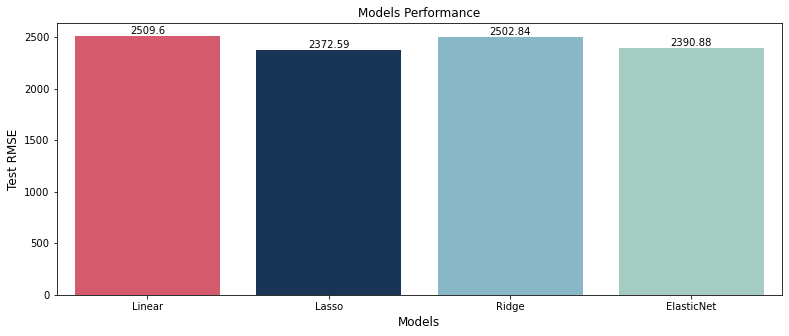

In [257]:
plt.figure(figsize=(13,5))
ax=sns.barplot(data=model_performance,x=model_performance.index,y="Test RMSE",palette=["#E94560","#0F3460","#7FBCD2","#9ED2C6"])
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Models Performance",size=12)
plt.ylabel("Test RMSE",size=12)
plt.xlabel("Models",size=12)
plt.show()